<a href="https://colab.research.google.com/github/Yuvraj3714/Global-Terrorism-Analysis-Yuvraj-Patel/blob/main/Global_Terrorism_Analysis_Yuvraj_Patel_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [2]:
# Importing all required modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Removing unwanted warnings.
import warnings 
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the Csv file and to storing it in "data".
data = pd.read_csv('/content/drive/MyDrive/Almabetter Dataset/Global Terrorism Data.csv',encoding="ISO-8859-1",engine='python')

# The data string is of **ISO-8859-1** encoding instead of UTF-8 encoding

In [5]:
# Displaying first five rows.
data.head() 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [89]:
# Displaying last five rows.
data.tail()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack_type,Target_type,Group_name,Motive,Weapon_type,Killed,Wounded,Success,Casualty
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,Armed Assault,Military,Al-Shabaab,NaN,Firearms,1.0,2.0,1,3.0
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,Bombing/Explosion,Military,Muslim extremists,NaN,Explosives,2.0,7.0,1,9.0
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,1,0.0
181689,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,Bombing/Explosion,Government (General),Unknown,NaN,Explosives,0.0,0.0,0,0.0
181690,2017,12,31,Philippines,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,NaN,12/31/2017: An explosive device was discovered...,Bombing/Explosion,Unknown,Unknown,NaN,Explosives,0.0,0.0,0,0.0


In [6]:
# Information about the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
# Number of Rows and Columns in Dataset. 
data.shape

(181691, 135)

In [8]:
# Displaying all the column names.
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
# Displaying discriptive statistic of dataset.
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Checking for NaN Values.
missing_value_count=data.isnull().sum()
missing_value_count

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

### **Percent of Missing Data**

In [11]:
#finding the percentage of missing data
total_cells=np.product(data.shape)
total_missing=missing_value_count.sum()

In [12]:
percent_missing=(total_missing/total_cells)*100
print(percent_missing)

56.481718962414206


# **Cleaning the Data**

#### **Considering only useful columns**



In [14]:
data=data[['iyear','imonth','iday','country_txt','region_txt','provstate','city','latitude',
       'longitude','location','summary','attacktype1_txt','targtype1_txt',
       'gname','motive','weaptype1_txt','nkill','nwound','success']]
data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,success
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,1
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,1
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,1
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,1


####  **Renaming the useful columns for better understanding** 

In [15]:
data.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location","summary":"Summary","attacktype1_txt":"Attack_type",
                   "targtype1_txt":"Target_type","gname":"Group_name","motive":"Motive","weaptype1_txt":"Weapon_type","nkill":"Killed","nwound":"Wounded",
                   "success":"Success"},inplace=True)

In [91]:
data.head(10)

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack_type,Target_type,Group_name,Motive,Weapon_type,Killed,Wounded,Success,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,1,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,1,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,1,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,1,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,1,0.0
5,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,NaN,1/1/1970: Unknown African American assailants ...,Armed Assault,Police,Black Nationalists,To protest the Cairo Illinois Police Deparment,Firearms,0.0,0.0,1,0.0
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,NaN,NaN,Assassination,Police,Tupamaros (Uruguay),NaN,Firearms,0.0,0.0,0,0.0
7,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Bombing/Explosion,Utilities,Unknown,NaN,Explosives,0.0,0.0,1,0.0
8,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,NaN,"1/2/1970: Karl Armstrong, a member of the New ...",Facility/Infrastructure Attack,Military,New Year's Gang,To protest the War in Vietnam and the draft,Incendiary,0.0,0.0,1,0.0
9,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,NaN,"1/3/1970: Karl Armstrong, a member of the New ...",Facility/Infrastructure Attack,Government (General),New Year's Gang,To protest the War in Vietnam and the draft,Incendiary,0.0,0.0,1,0.0


In [17]:
#Information about the datset that is conatining useful columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181257 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack_type     181691 non-null  object 
 12  Target_type     181691 non-null  object 
 13  Group_name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon_type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

In [18]:
data.shape

(181691, 19)

In [19]:
data.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack_type            0
Target_type            0
Group_name             0
Motive            131130
Weapon_type            0
Killed             10313
Wounded            16311
Success                0
dtype: int64

### **Displaying all the Unique values from the dataset.**

In [20]:
# Displaying the total number of all unique countries.
data["Country"].nunique()

205

In [21]:
# Displaying all unique Region names.
print(data["Region"].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


In [22]:
# Displaying all unique Type of attacks.
data["Attack_type"].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [23]:
# Displaying the total number of all Group names.
data["Group_name"].nunique()

3537

In [24]:
# Displaying all unique Type of Weapons.
data["Weapon_type"].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [25]:
# Displaying all unique Targets.
data["Target_type"].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

## filling the null value with zeros

In [26]:
# filling the null value with zeros in 'Killed' and 'Wounded' columns.
data['Killed']=data['Killed'].fillna(0)
data['Wounded']=data['Wounded'].fillna(0)

## Adding a new column Casualty

In [27]:
data["Casualty"]=data["Killed"]+data["Wounded"]

In [28]:
# Displaying discriptive statistic of dataset
data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Success,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,0.889598,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,0.313391,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,1.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,1.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,1.000000,9574.000000


In [29]:
# Displaying all the Unique values from the dataset in each Columns.

dict={}
for i in data.columns:
    dict[i]=data[i].value_counts().shape[0]

 # Converting rows into columns and columns into rows.   
pd.DataFrame(dict,index=['Unique']).transpose()

,Unique
Year,47
Month,13
Day,32
Country,205
Region,12
Province/State,2855
City,36674
Latitude,48322
Longitude,48039
Location,44109


# **Visualizing the Data**

#### **Visualizing the Data year wise by segregating the data on Number of Terrorist attacks,total number of people killed ,total number of people Wounded and total number of people Casualty.**

### **1) Number of Attacks in particular Year**

In [30]:
attacks=data["Year"].value_counts(dropna=False).sort_index().to_frame().rename(columns={"Year":"Attacks"})
attacks

,Attacks
1970,651
1971,471
1972,568
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526
1979,2662


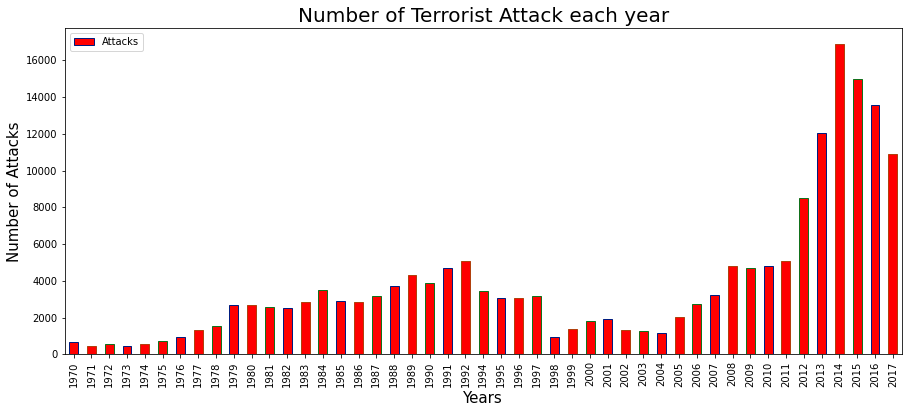

In [31]:
# Plotting a graph of Terrorist Attacks each year.

attacks.plot(kind="bar",figsize=(15,6),color='r',edgecolor=sns.color_palette("dark", 3))
plt.xticks(rotation=90)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.title("Number of Terrorist Attack each year",fontsize=20)
plt.show()

In [106]:
#Finding the index position of maximum and Minimum Attacks.
print(attacks.idxmax(),attacks.max())
print(attacks.idxmin(),attacks.min())

Attacks    2014
dtype: int64 Attacks    16903
dtype: int64
Attacks    1971
dtype: int64 Attacks    471
dtype: int64


# **INFERENCE**

### (i) Maximum Attacks happend was **16903** in **2014**
### (ii) Minimum Attacks happend was **471** in **1971**

##### **2) People Killed in particular Year**

In [33]:
#Extracting the data from the column "year" and "killed" and storing in a variable "Year_k"
Year_k=data[['Year','Killed']].groupby('Year').sum()
Year_k

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0
1975,617.0
1976,674.0
1977,456.0
1978,1459.0


In [105]:
#Finding the index position of maximum and Minimum Killed.
print(Year_k.idxmax(),Year_k.max())
print(Year_k.idxmin(),Year_k.min())

Killed    2014
dtype: int64 Killed    44490.0
dtype: float64
Killed    1971
dtype: int64 Killed    173.0
dtype: float64


# **INFERENCE**

####**Killed**
###(a) Most number of people killed: **44490** in **2014**
###(b) Least number of people killed: **173** in **1971**

#### **3) People Wounded in particular Year**

In [34]:
#Extracting the data from the column "year" and "Wounded" and storing in a variable "Year_w"

Year_w=data[["Year","Wounded"]].groupby('Year').sum()
Year_w

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0
1975,617.0
1976,756.0
1977,518.0
1978,1600.0


In [104]:
#Finding the index position of maximum and Minimum Wounded.
print(Year_w.idxmax(),Year_w.max())
print(Year_w.idxmin(),Year_w.min())

Wounded    2015
dtype: int64 Wounded    44043.0
dtype: float64
Wounded    1971
dtype: int64 Wounded    82.0
dtype: float64


# **INFERENCE**

#### **Wounded**
###(a) Most number of people wounded: **44043** in **2015**
###(b) Least number of people wounded: **82** in **1971**

#### **4) Total Casualty in particular Year**

In [35]:
#Extracting the data from the column "year" and "Casualty" and storing in a variable "Year_c"

Year_c=data[["Year","Casualty"]].groupby("Year").sum()
Year_c

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0
1975,1234.0
1976,1430.0
1977,974.0
1978,3059.0


In [103]:
#Finding the index position of maximum and Minimum Casualty.
print(Year_c.idxmax(),Year_c.max())
print(Year_c.idxmin(),Year_c.min())

Casualty    2014
dtype: int64 Casualty    85618.0
dtype: float64
Casualty    1971
dtype: int64 Casualty    255.0
dtype: float64


# **INFERENCE**

#### **Casualties**
###(a) Most number of casualties: **85618** in **2014**
###(b) Least number of casualties: **255** in **1971**


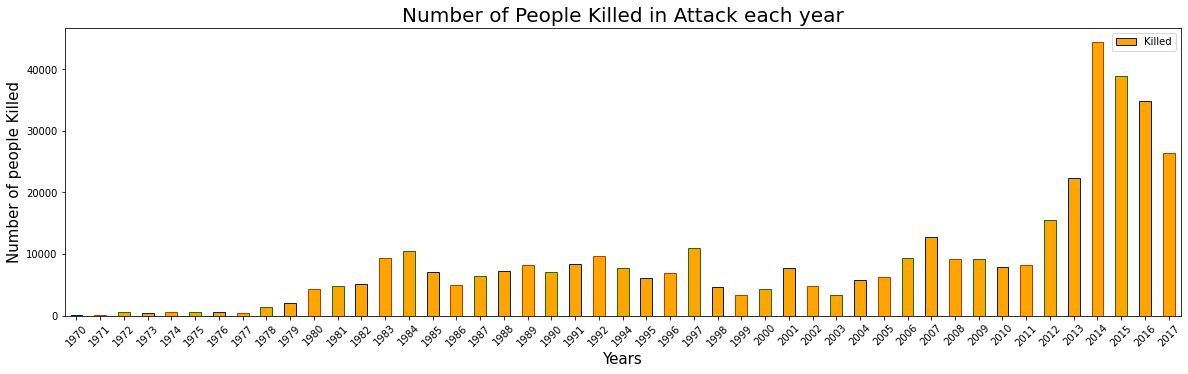

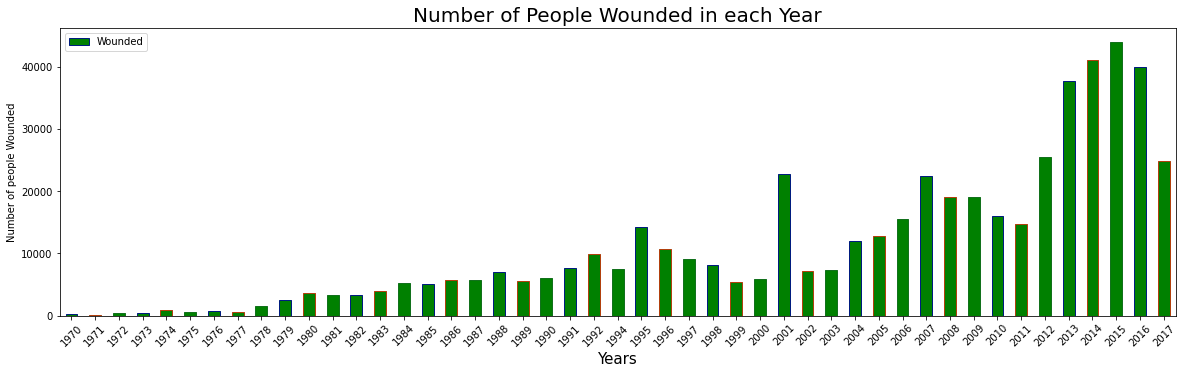

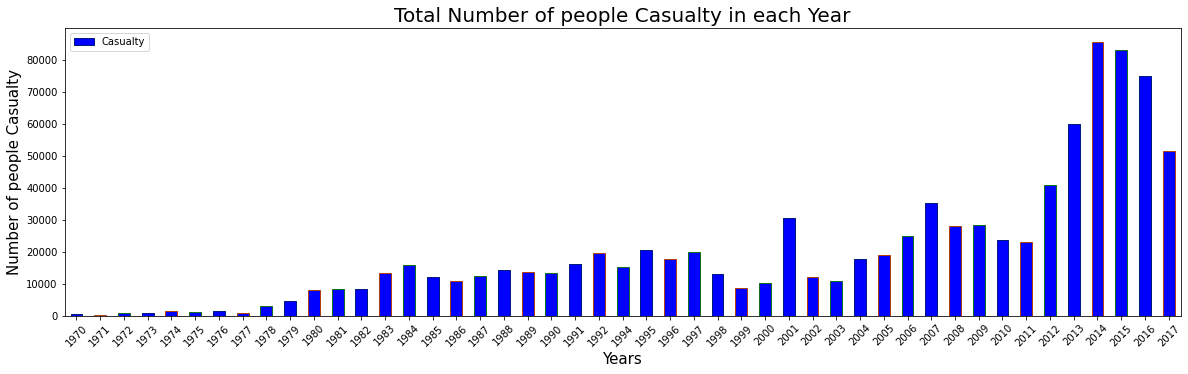

In [36]:
#Plotting a graph on Total number of people Killed,Wounded and Casualty.

ax0=plt.subplot(3,1,1)
Year_k.plot(kind="bar",figsize=(20,18),color='orange',edgecolor=sns.color_palette("dark", 3),ax=ax0)
plt.xticks(rotation=45)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of people Killed",fontsize=15)
plt.title("Number of People Killed in Attack each year",fontsize=20)
plt.show()

ax1=plt.subplot(3,1,2)
Year_w.plot(kind="bar",figsize=(20,18),color='g',edgecolor=sns.color_palette("dark",3),ax=ax1)
plt.xticks(rotation=45)
plt.title("Number of People Wounded in each Year",fontsize=20)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of people Wounded")
plt.show()

ax2=plt.subplot(3,1,3)
Year_c.plot(kind="bar",figsize=(20,18),color='b',edgecolor=sns.color_palette("dark",3),ax=ax2)
plt.xticks(rotation=45)
plt.title("Total Number of people Casualty in each Year",fontsize=20)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of people Casualty",fontsize=15)
plt.show()




# **Top 10 Countries which were Attacked**

In [37]:
# Displaying the 10 most affected Countries.
country_attacks=data['Country'].value_counts()[:10].to_frame()
country_attacks

,Country
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235
Turkey,4292


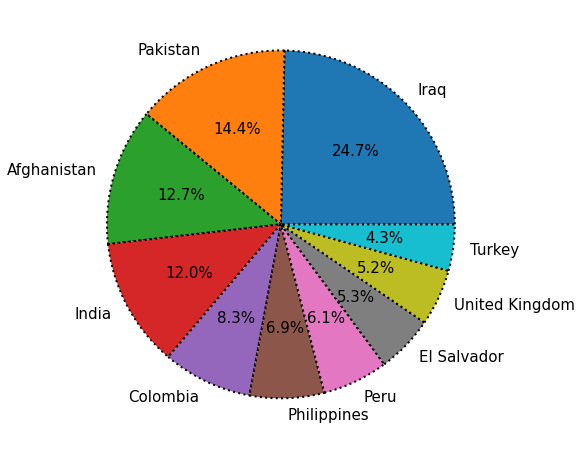

In [38]:
# plotting a pie chart to represent the 10 most affected countries.

plt.figure(figsize=(10,8))
plt.pie(country_attacks,labels=country_attacks.index,autopct='%2.1f%%', wedgeprops = {'linewidth':2,'edgecolor':'black','linestyle': 'dotted'},textprops={'fontsize': 15})
plt.show()

####                **Country wise Attacks [Top 10]**
####  (a) Most number of attacks: **24636** in **"Iraq"**
####  (b) Least number of attacks: **4292** in **"Turkey"**

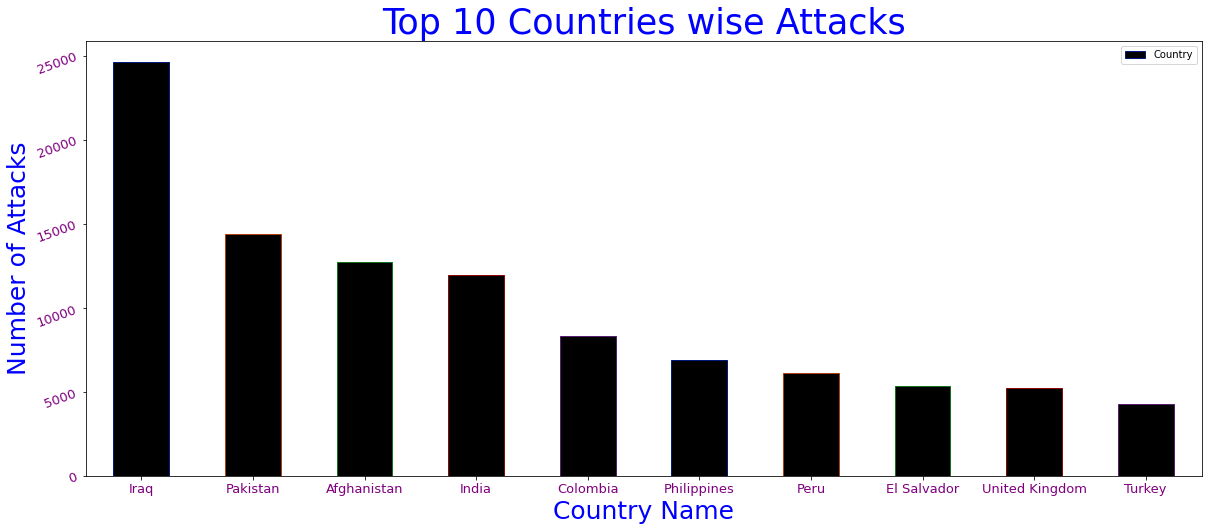

In [39]:
# Plotting a bargraph to represent the top 10 most affected countries.
country_attacks.plot(kind="bar",color='k',edgecolor=sns.color_palette("dark",5),figsize=(20,8))
plt.xticks(rotation=360,fontsize=13,color='purple')
plt.yticks(rotation=20,fontsize=13,color='purple')
plt.title("Top 10 Countries wise Attacks",fontsize=35,color='b')
plt.xlabel("Country Name",fontsize=25,color='b')
plt.ylabel("Number of Attacks",fontsize=25,color='b')
plt.show()

In [40]:
# Displaying the total number of Killed in Top 10 countries.
country_killed=data[['Country','Killed']].groupby('Country').sum().sort_values(by='Killed',ascending=False)[:10]
country_killed

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


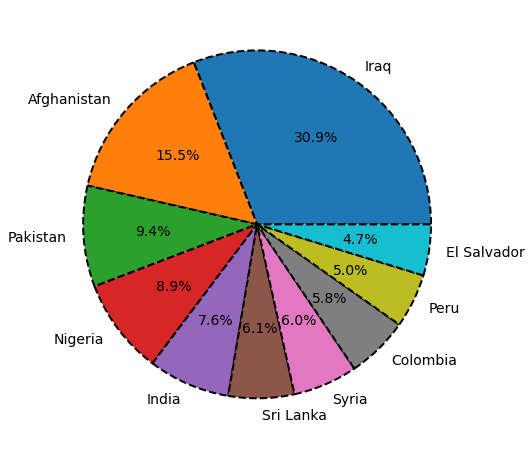

In [41]:
# plotting a pie chart to represent the total number of people killed in top 10 most affected countries.
plt.figure(figsize=(10,8))
plt.pie(country_killed,labels=country_killed.index,autopct='%2.1f%%', wedgeprops = {'linewidth':2,'edgecolor':'black','linestyle': 'dashed'},textprops={'fontsize':14})
plt.show()

# **INFERENCE**

### Most Number of people Killed was **78589** in **Iraq**
### Least Number of People Killed was **12053** in El **salvador**

In [42]:
# Displaying the total number of Wounded in Top 10 countries.
country_wounded=data[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)[:10]
country_wounded

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


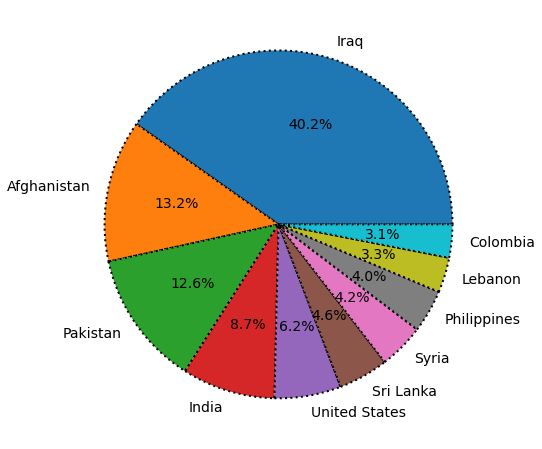

In [43]:
# plotting a pie chart to represent the total number of people Wounded in top 10 most affected countries.

plt.figure(figsize=(15,8))
plt.pie(country_wounded,labels=country_wounded.index,autopct='%2.1f%%', wedgeprops = {'linewidth':2,'edgecolor':'black','linestyle': 'dotted'},textprops={'fontsize':14})
plt.show()

# **INFERENCE**

### Most Number of people Wounded was **134690** in **Iraq**
### Least Number of people Wounded was **10328** in **Colombia**

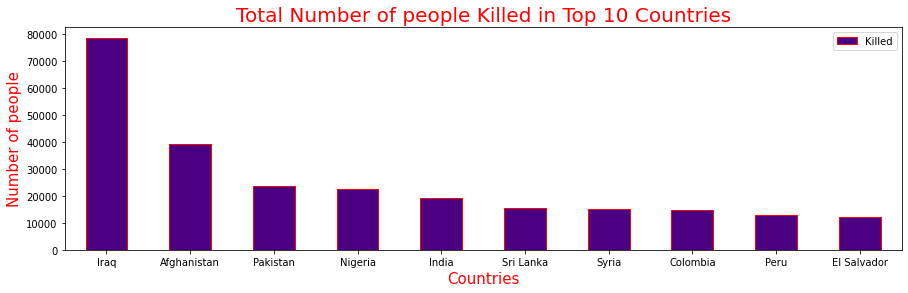

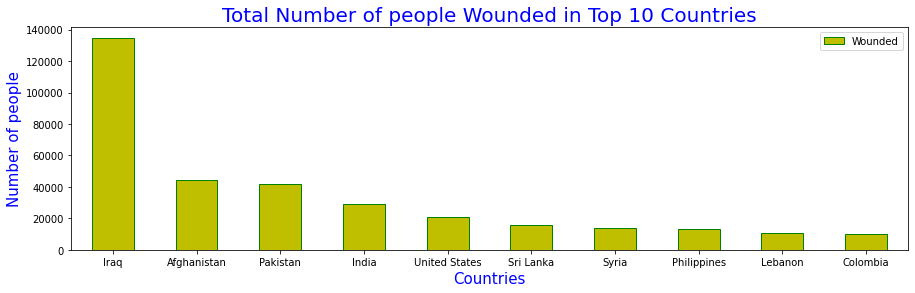

In [44]:
# Plotting a graph to represent total number of people Killed and Wounded.

ax0=plt.subplot(2,1,1)
country_killed.plot(kind="bar",color='indigo',figsize=(15,9),edgecolor="red",ax=ax0)
plt.xticks(rotation=360)
plt.title("Total Number of people Killed in Top 10 Countries",fontsize=20,color='r')
plt.xlabel("Countries",fontsize=15,color='r')
plt.ylabel("Number of people",fontsize=15,color='r')
plt.show()



ax1=plt.subplot(2,1,2)
country_wounded.plot(kind="bar",color='y',figsize=(15,9),edgecolor="g",ax=ax1)
plt.xticks(rotation=360)
plt.title("Total Number of people Wounded in Top 10 Countries",fontsize=20,color='b')
plt.xlabel("Countries",fontsize=15,color='b')
plt.ylabel("Number of people",fontsize=15,color='b')
plt.show()


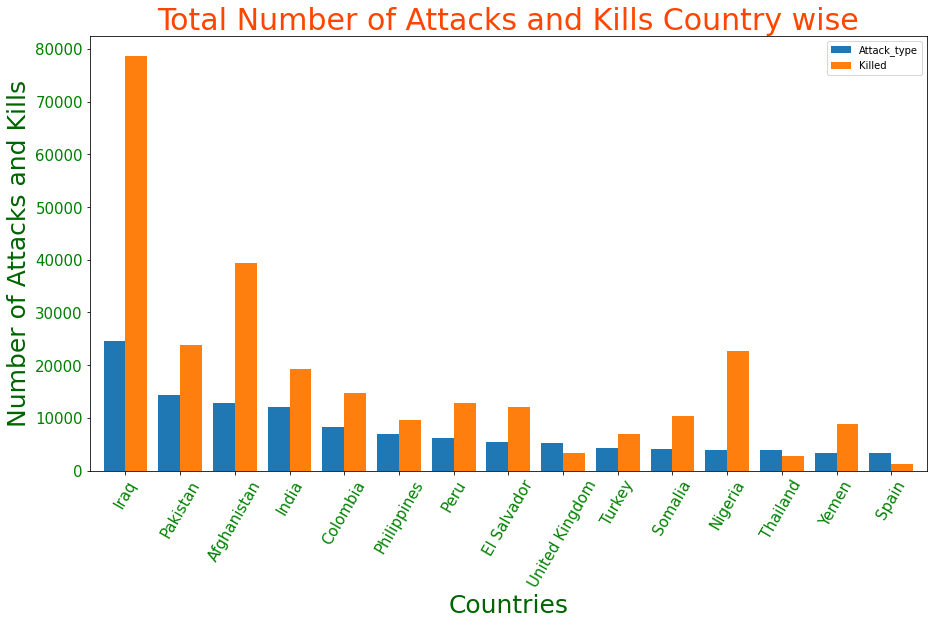

In [45]:
#Plotting a graph to represent number of Attacks and people killed in top 15 countries.
Country_d=data['Country'].value_counts()[:15].to_frame()
Country_d.columns=['Attack_type']
Country_detail=data.groupby('Country')['Killed'].sum().to_frame()
Country_d.merge(Country_detail,left_index=True,right_index=True,how='left').plot.bar(width=0.8,figsize=(15,8))
plt.title("Total Number of Attacks and Kills Country wise",fontsize=30,color='orangered')
plt.xlabel("Countries", fontsize=25,color='darkgreen')
plt.xticks(rotation=60,fontsize=15,color='g')
plt.ylabel("Number of Attacks and Kills", fontsize=25,color='darkgreen')
plt.yticks(fontsize=15,color='g')

plt.show()


## **INFERENCE**
## Out of **24636** attacks in Iraq **78589** people were killed

# **Top 10 Terrorist groups with highest terror attacks**

In [46]:
# Displaying the name of Groups who have highest number of terror attacks.
Group=data['Group_name'].value_counts().drop("Unknown")[:10]
Group


Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group_name, dtype: int64

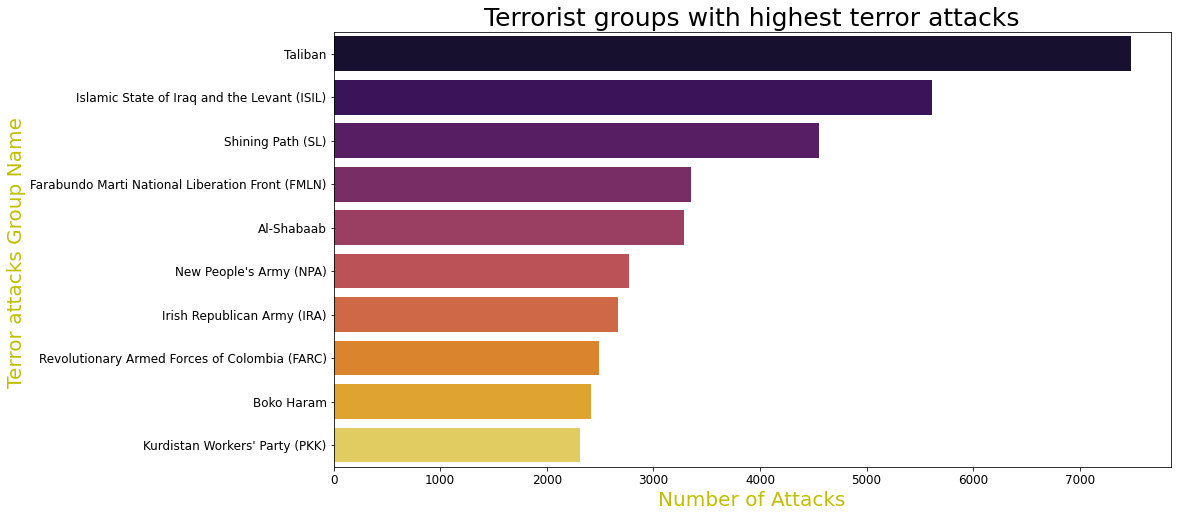

In [47]:
# Plotting a graph to represent Top 10 groups which have maximum number of terror attacks.

plt.figure(figsize=(15,8))
sns.barplot(data['Group_name'].value_counts()[1:11].values,data['Group_name'].value_counts().drop("Unknown")[:10].index,palette=('inferno'))
plt.title("Terrorist groups with highest terror attacks",fontsize=25,color='k')
plt.xlabel("Number of Attacks",fontsize=20,color='y')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Terror attacks Group Name ",fontsize=20,color='y')
plt.show()

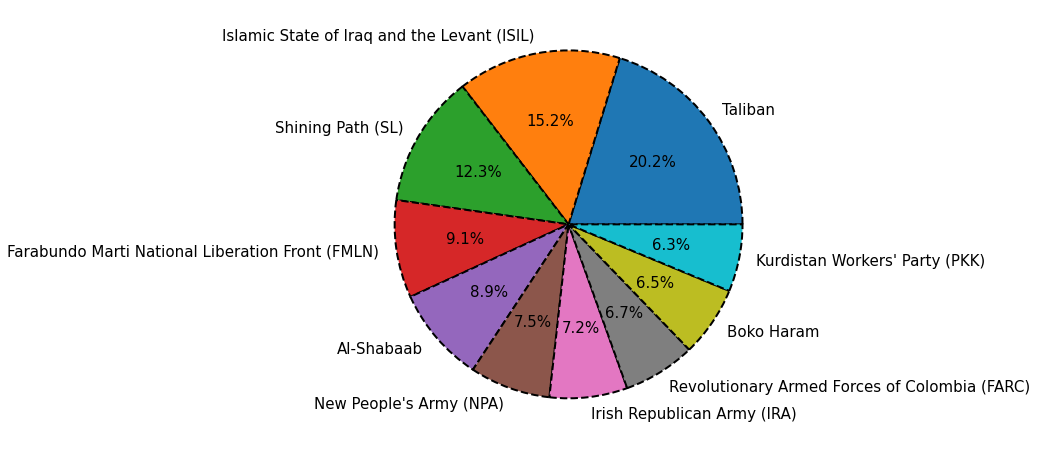

In [48]:
# Plotting a Pie chart to represent Top 10 groups which have maximum number of terror attacks.


plt.figure(figsize=(10,8))
plt.pie(Group,labels=Group.index,autopct='%2.1f%%',wedgeprops={'linewidth':2,'edgecolor':'black','linestyle':'dashed'},textprops={'fontsize':15})
plt.show()

# **INFERENCE**
###**In top 10 Group**
### **Taliban** Group has the highest number of Attack i.e **7478** times
## **Kurdistan Workers' Party (PKK)** has the least number of Attack i.e **2310** times


# **Top 10 Groups who have Killed maximum number of people**

In [49]:
# Displaying the total number of people Killed by top 10 Groups.
Group_killed=data[['Group_name','Killed']].groupby('Group_name').sum().sort_values(by='Killed',ascending=False)[1:11]
Group_killed

,Killed
Group_name,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


# **INFERENCE**
### **Top 10 Group**
### **Islamic State of Iraq and the Levant (ISIL)** have killed Most number of people i.e **38923** 
### **Revolutionary Armed Forces of Colombia (FARC)** have killed least number of people i.e **5661** 

# **Top 10 Groups who have Wounded maximum number of people**

In [50]:
# Displaying the total number of people Wounded by top 10 Groups.
Group_wounded=data[['Group_name','Wounded']].groupby('Group_name').sum().sort_values(by='Wounded',ascending=False)[1:11]
Group_wounded

,Wounded
Group_name,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


# **INFERENCE**
### **Top 10 Group**
### **Islamic State of Iraq and the Levant (ISIL)**have Wounded Most number of people i.e **30672**
### **IsKurdistan Workers' Party (PKK)**have Wounded Least number of people i.e **4908**

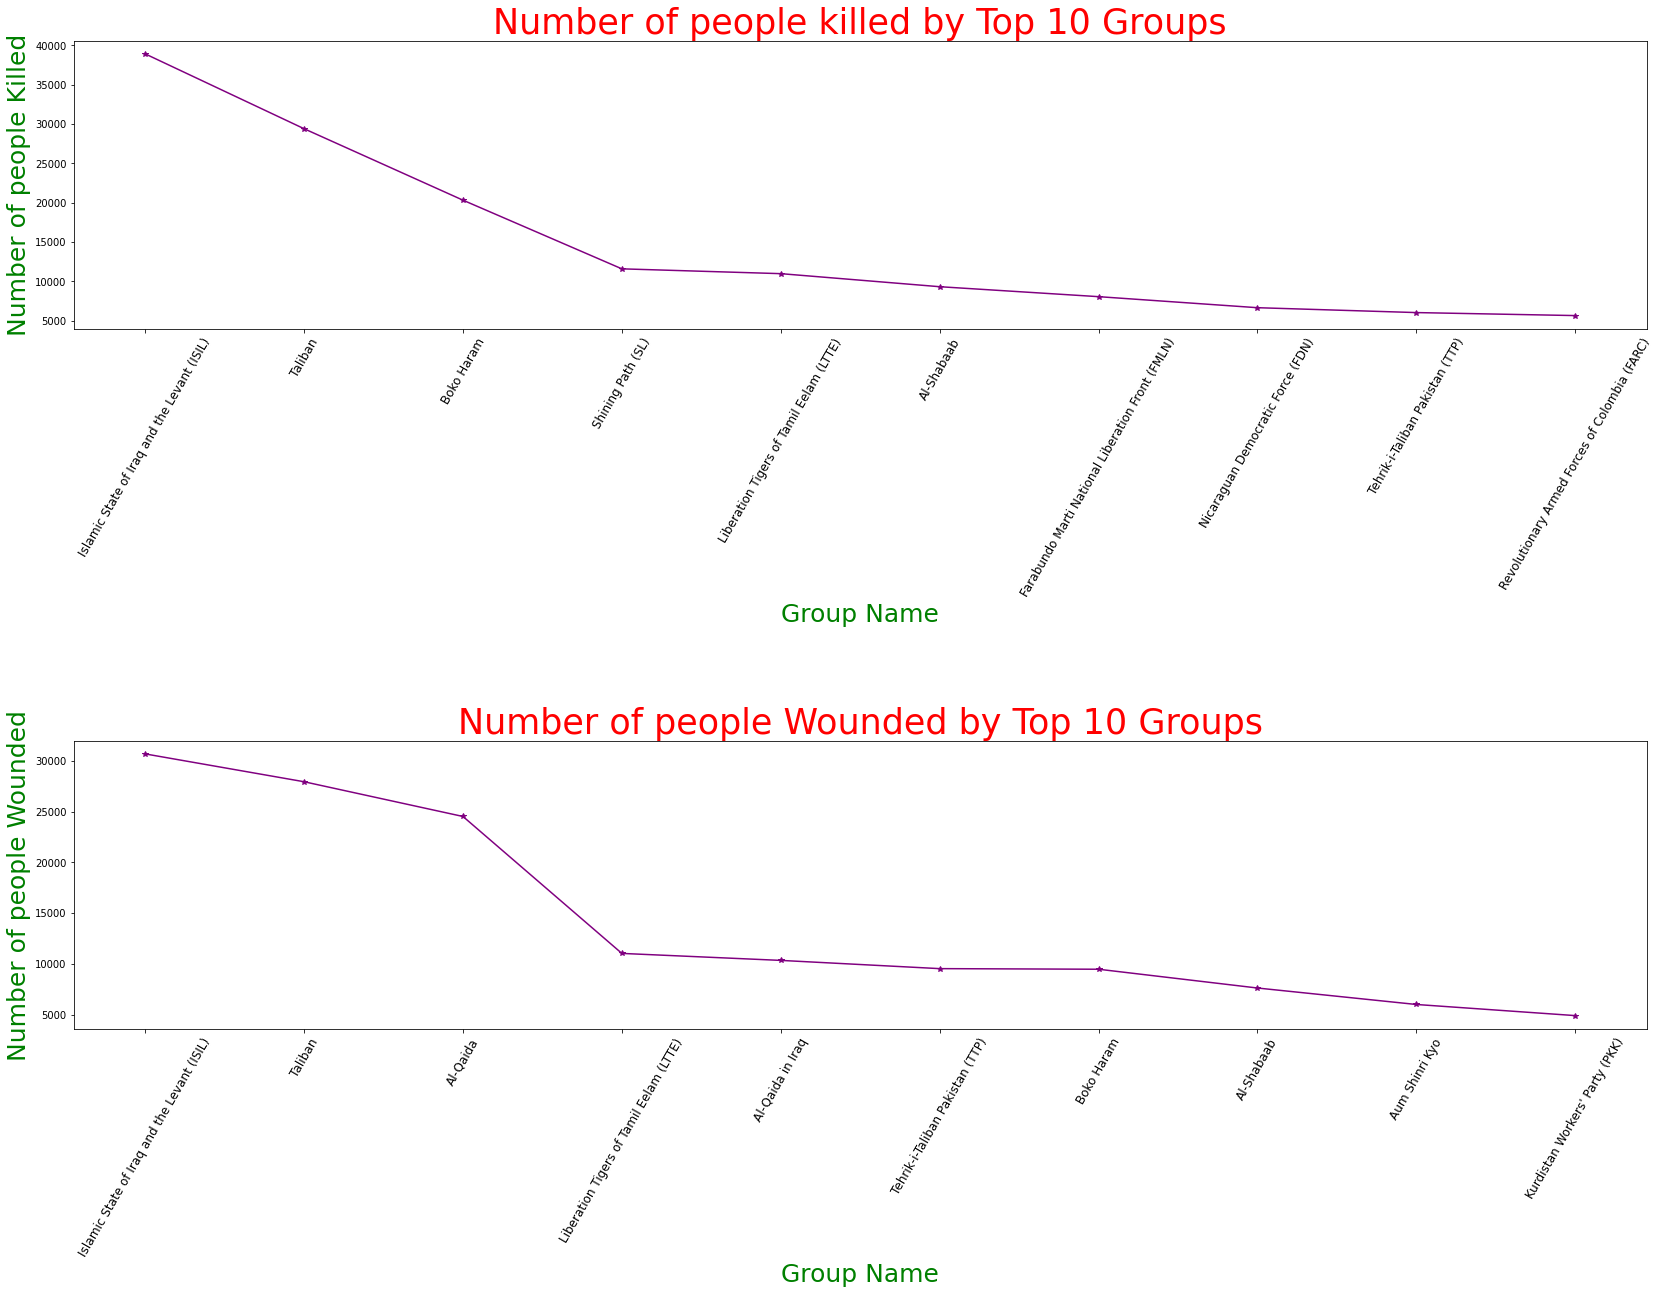

In [51]:
# Plotting a Graph to represent the total number of people Killed and Wounded by Top 10 Groups.

fig = plt.figure(figsize=(25,20))

plt.subplot(211)
plt.title('Number of people killed by Top 10 Groups', fontsize=35,color='r')
plt.xlabel('Group Name',fontsize=25,color='g')
plt.ylabel('Number of people Killed',fontsize=25,color='g')
plt.plot(Group_killed,'-*',color='purple')
plt.xticks(rotation=60,fontsize=12)
plt.tight_layout()



plt.subplot(212)
plt.title('Number of people Wounded by Top 10 Groups', fontsize=35,color='r')
plt.xlabel('Group Name',fontsize=25,color='g')
plt.ylabel('Number of people Wounded',fontsize=25,color='g')
plt.plot(Group_wounded,'-*',color='purple')
plt.xticks(rotation=60,fontsize=12)
plt.tight_layout(8)
plt.show()


# **Types of Attacks in terror attacks**

In [52]:
# Displaying the Types of attack during terror attacks.
data['Attack_type'].value_counts().to_frame()

,Attack_type
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unknown,7276
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659


# **INFERENCE**

### **Bombing/Explosion** were used maximum time i.e **88255** in Terror Attacks
### **Hijacking** were used minimum time i.e **659** in Terror Attacks

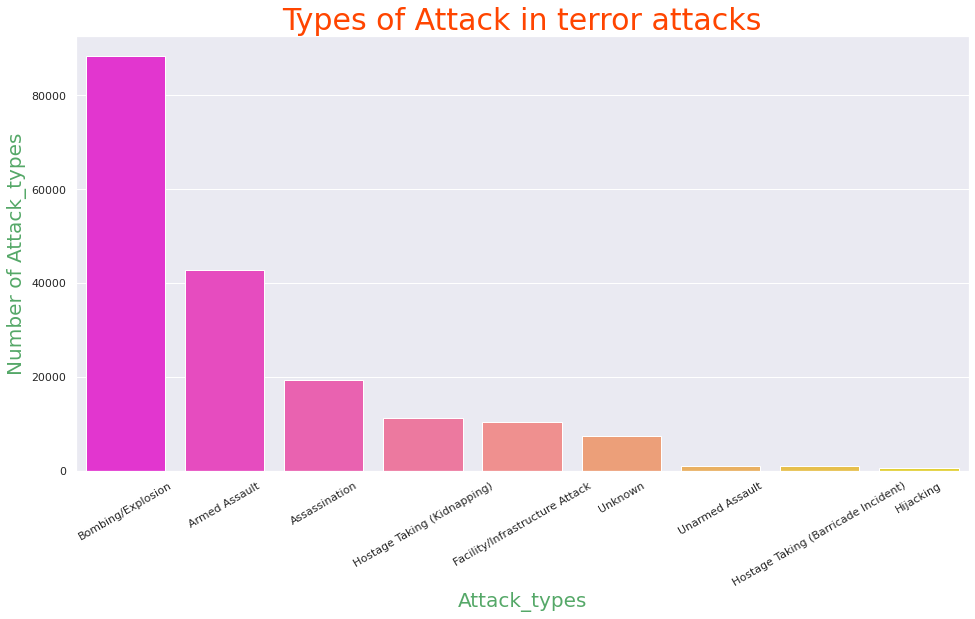

In [53]:
# plotting a graph to represent types of attacks used during Terror attacks.
plt.figure(figsize=(16,8))
sns.set(style='darkgrid')
sns.countplot(x='Attack_type', data=data,order=data['Attack_type'].value_counts().index, palette="spring")
plt.title("Types of Attack in terror attacks",fontsize=30,color='orangered')
plt.xlabel("Attack_types",fontsize=20,color='g')
plt.ylabel("Number of Attack_types",fontsize=20,color='g')
plt.xticks(rotation=30)
plt.show()

In [54]:
# Displaying total number of people killed due to different types of attack.
Attack_killed=data[['Attack_type','Killed']].groupby('Attack_type').sum().sort_values(by='Killed',ascending=False)
Attack_killed

,Killed
Attack_type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


# **INFERENCE**

### Due to **Armed Assault** most people were Killed i.e **160297**
### Due to **Unarmed Assault** Least people were Killed i.e **880**

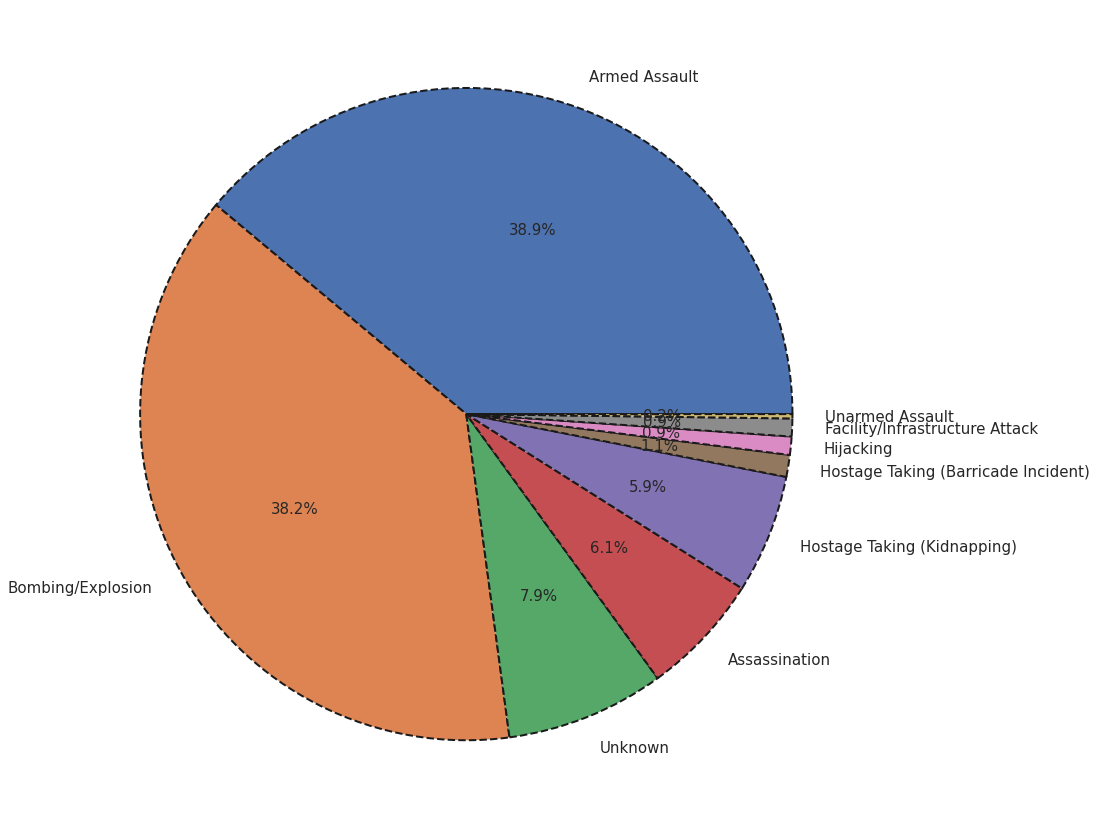

In [55]:
# Plotting a pie chart to represent total number of people killed in different types of attack.
plt.figure(figsize=(20,15))
plt.pie(Attack_killed,autopct='%2.1f%%',labels=Attack_killed.index,wedgeprops={'linewidth':2,'edgecolor':'k','linestyle':'dashed'},textprops={'fontsize':15})
plt.show()

In [56]:
# Displaying total number of people Wounded in different types of attack.
Attack_wounded=data[['Attack_type','Wounded']].groupby('Attack_type').sum().sort_values(by='Wounded',ascending=False)
Attack_wounded

,Wounded
Attack_type,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


# **INFERENCE**

### Due to **Bombing/Explosion** Most people were Wounded i.e **372686**
### Due to **Facility/Infrastructure Attack** Least people were Wounded i.e **3765**

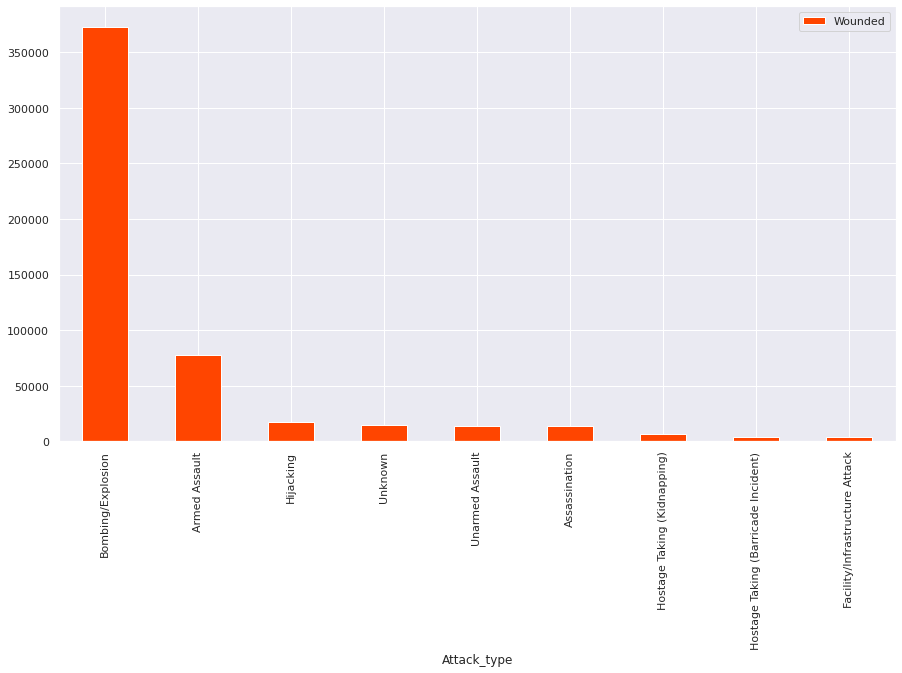

In [57]:
# Plotting a graph to represent total number of people Wounded during different attacks.
Attack_wounded.plot(kind='bar',color='orangered',figsize=(15,8))
plt.show()

# **Region wise Attacks**

In [58]:
# Displaying the Attacks in particular year in certain Region.
Region_attacks=pd.crosstab(data.Year,data.Region)
Region_attacks.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


## Distribution of Terrorist Attacks over Regions from **1970-2017**

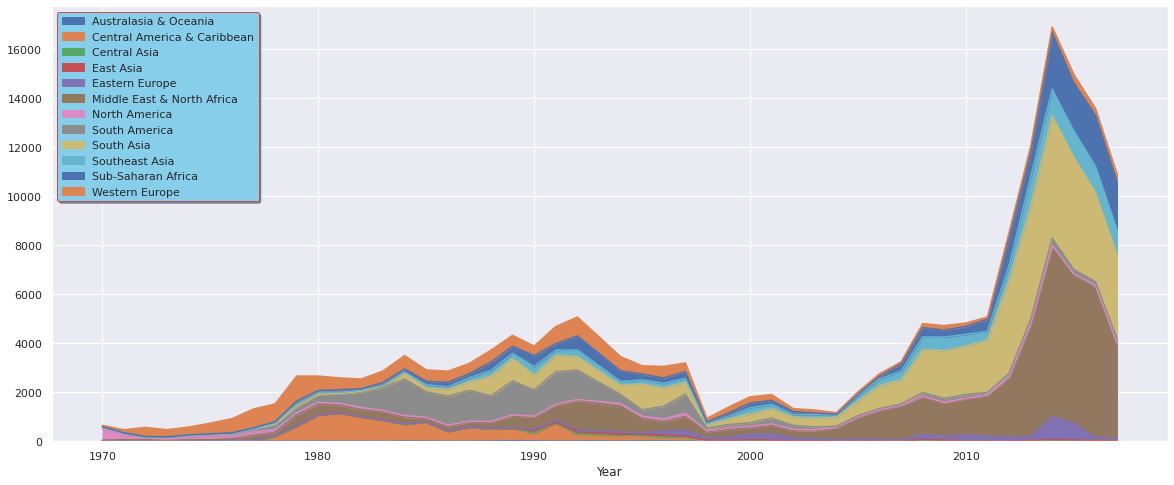

In [59]:
Region_attacks.plot(kind="area",figsize=(20,8))
plt.legend(loc="upper left",edgecolor='r',shadow=True,facecolor='skyblue')
plt.show()

In [60]:
# Displaying the total number of attacks in each Region.

Region_attacks_trans=Region_attacks.transpose()
Region_attacks_trans["Total"]=Region_attacks_trans.sum(axis=1)
Region_a_t_t=Region_attacks_trans["Total"].sort_values(ascending=False)
Region_a_t_t

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

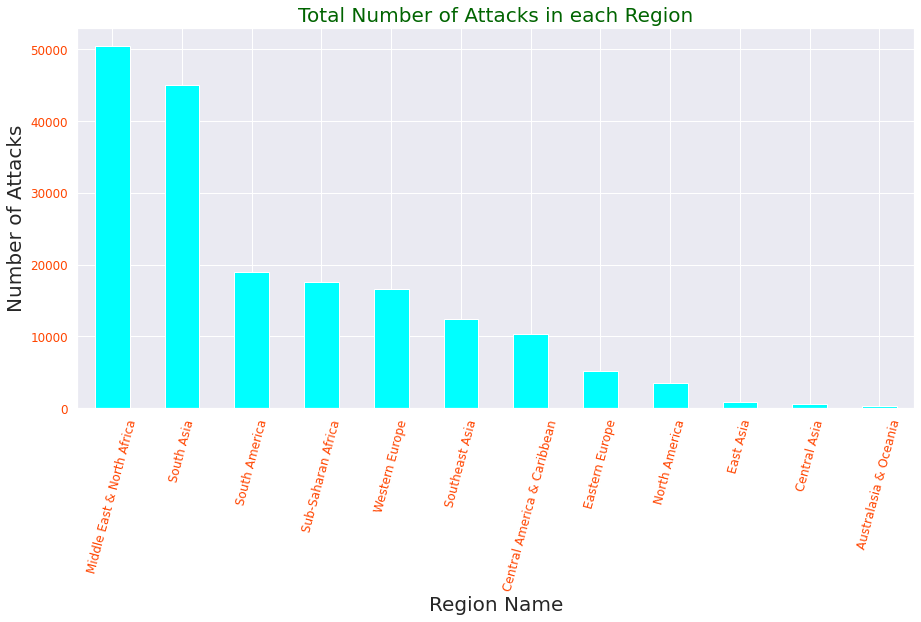

In [61]:
# Plotting a graph to represent total number of attacks in each Region.

Region_a_t_t.plot(kind="bar",color="Cyan",figsize=(15,7))
plt.title("Total Number of Attacks in each Region",fontsize=20,color='darkgreen')
plt.xlabel("Region Name",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.xticks(rotation=75,color='orangered',fontsize=12)
plt.yticks(color='orangered',fontsize=12)
plt.show()

In [62]:
# Displaying the total number of people Killed in each Region.
Region_killed=data[['Region','Killed']].groupby('Region').sum().sort_values(by='Killed',ascending=False)
Region_killed

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


# **INFERENCE**

### In **Middle East & North Africa** Region Most people were Killed i.e **137642**
### In **Australasia & Oceania** Region Least people were Killed i.e **150**


In [63]:
# Displaying the total number of people Wounded in each Region.
Region_wounded=data[['Region','Wounded']].groupby('Region').sum().sort_values(by='Wounded',ascending=False)
Region_wounded

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


# **INFERENCE**

### In **Middle East & North Africa** Region Most people were Wounded i.e **214308**
### In **Australasia & Oceania** Region Least people were Wounded i.e **260**

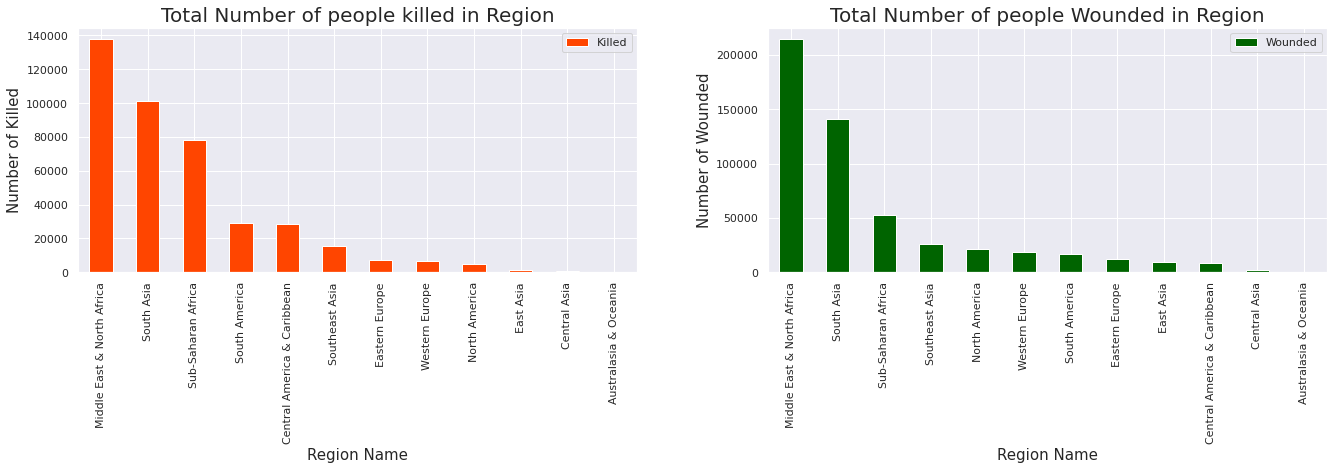

In [64]:
# Plotting a graph to represent total number of people Killed and Wounded in each Region

plt.figure(figsize=(20,8))

ax0=plt.subplot(121)
Region_killed.plot(kind='bar',color='orangered',ax=ax0)
plt.title("Total Number of people killed in Region",fontsize=20)
plt.xlabel("Region Name",fontsize=15)
plt.ylabel("Number of Killed",fontsize=15)


ax1=plt.subplot(122)
Region_wounded.plot(kind='bar',color='darkgreen',ax=ax1)
plt.title("Total Number of people Wounded in Region",fontsize=20)
plt.xlabel("Region Name",fontsize=15)
plt.ylabel("Number of Wounded",fontsize=15)
plt.tight_layout(5)
plt.show()



In [65]:
# Displaying the total number of people Casualty in each Region.
Region_casualty=data[['Region','Casualty']].groupby('Region').sum().sort_values(by='Casualty',ascending=False)
Region_casualty

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


# **INFERENCE**

### In **Middle East & North Africa** Region Most people were Casualty i.e **351950**
### In **Australasia & Oceania** Region Least people were Casualty i.e **410**

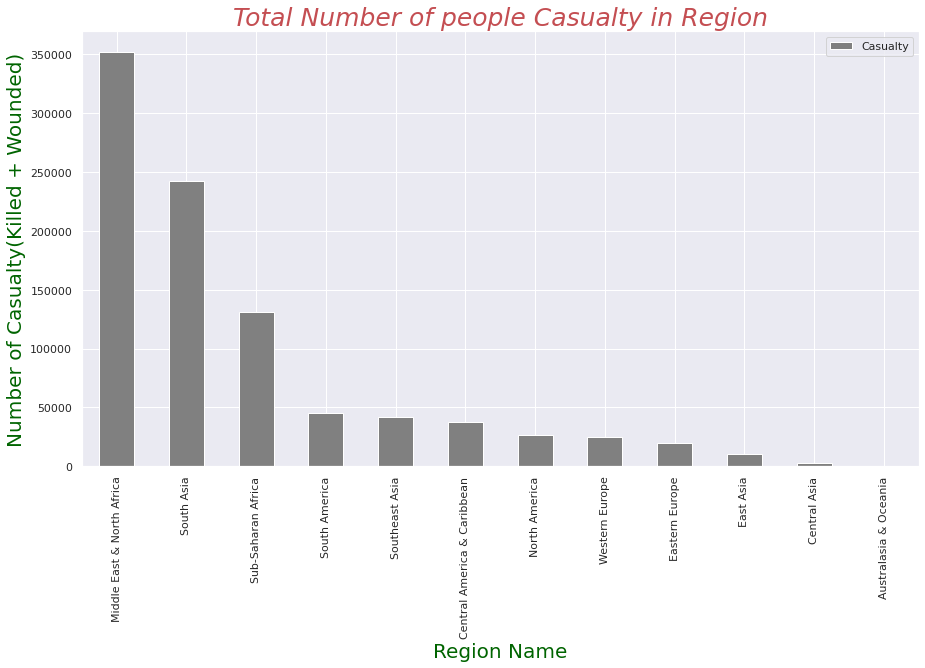

In [66]:
# Plotting a graph to represent total number of people Casualty in each Region
Region_casualty.plot(kind='bar',color='grey',figsize=(15,8))
plt.title("Total Number of people Casualty in Region",fontsize=25,fontstyle='oblique',color='r')
plt.xlabel("Region Name",fontsize=20,color='darkgreen')
plt.ylabel("Number of Casualty(Killed + Wounded)",fontsize=20,color='darkgreen')
plt.show()

## **[Top 10]City wise Attacks**

In [67]:
# Displaying the Number of Attacks in Top 10 Cities.
data['City'].value_counts().drop('Unknown')[:10]

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

# **INFERENCE**

### In **Baghdad** City there were maximum attacks i.e **7589**
### In **Athens** City there were maximum attacks i.e **1019**

In [68]:
# Displaying the total number of people Killed in Top 10 cities.
City_killed=data[['City','Killed']].groupby('City').sum().sort_values(by='Killed',ascending=False).drop("Unknown")[:10]
City_killed

,Killed
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


# **INFERENCE**
### **Top 10 City**
### In **Baghdad** City Maximum people were Killed i.e **21151**
### In **Aleppo** City Maximum people were Killed i.e **2125**


In [69]:
# Displaying the total number of people Wounded in Top 10 cities.
City_wounded=data[['City','Wounded']].groupby('City').sum().sort_values(by='Wounded',ascending=False).drop("Unknown")[:10]
City_wounded

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


# **INFERENCE**
### **Top 10 City**
### In **Baghdad** city maximum people were Wounded i.e **56725**
### In **Mogadishu** city maximum people were Wounded i.e **4955**

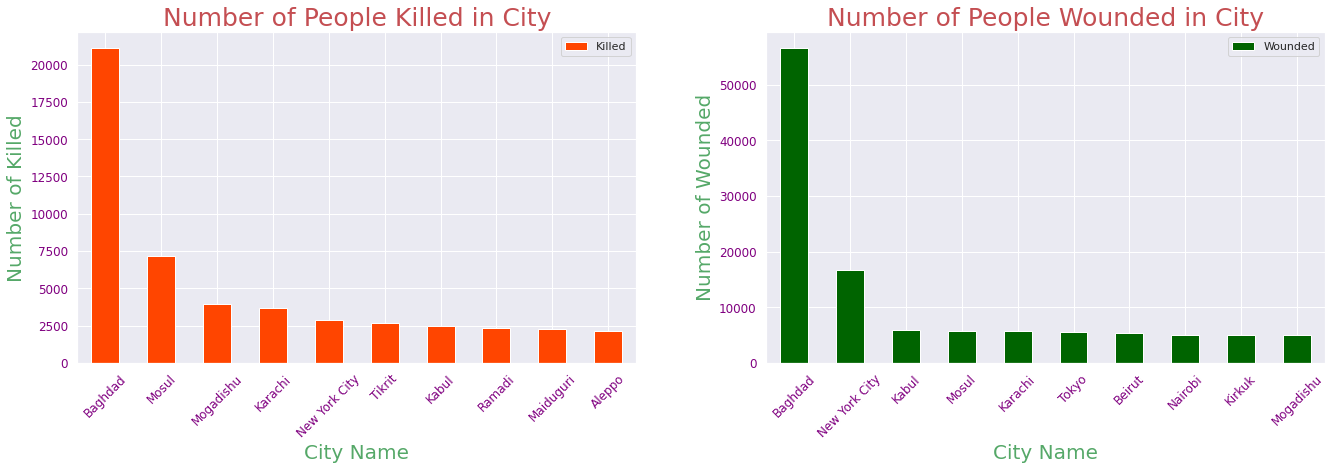

In [70]:
# Plotting a graph to represent total number of people Killed and Wounded in each Cities.

plt.figure(figsize=(20,8))

ax0=plt.subplot(1,2,1)
City_killed.plot(kind='bar',color="orangered",ax=ax0)
plt.title("Number of People Killed in City",fontsize=25,color='r')
plt.xlabel("City Name",fontsize=20,color="g")
plt.xticks(rotation=45,fontsize=12,color='purple')
plt.ylabel("Number of Killed",fontsize=20,color="g")
plt.yticks(fontsize=12,color='purple')


ax1=plt.subplot(1,2,2)
City_wounded.plot(kind='bar',color="darkgreen",ax=ax1)
plt.title("Number of People Wounded in City",fontsize=25,color='r')
plt.xlabel("City Name",fontsize=20,color="g")
plt.xticks(rotation=45,fontsize=12,color='purple')
plt.ylabel("Number of Wounded",fontsize=20,color="g")
plt.yticks(fontsize=12,color='purple')
plt.tight_layout(5)
plt.show()

In [71]:
# Displaying the total number of people Casualty in Top 10 cities.
City_casualty=data[['City','Casualty']].groupby('City').sum().sort_values(by='Casualty',ascending=False).drop("Unknown")[:10]
City_casualty

,Casualty
City,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


# **INFERENCE**
### **Top 10 City**
### In **Baghdad** city Most people were **Casualty**(Killed+Wounded) i.e **56725**
### In **Aleppo** city Least people were **Casualty**(Killed+Wounded) i.e **5748**

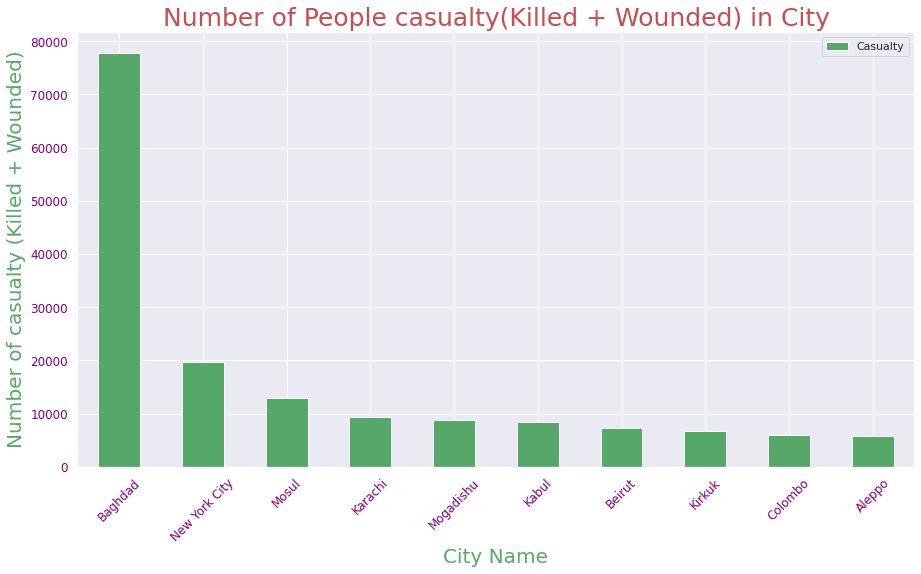

In [72]:
# Plotting a graph to represent total number of people Casualty(Killed + Wounded) in each Cities.
City_casualty.plot(kind='bar',color="g",figsize=(15,8))
plt.title("Number of People casualty(Killed + Wounded) in City",fontsize=25,color='r')
plt.xlabel("City Name",fontsize=20,color="g")
plt.xticks(rotation=45,fontsize=12,color='purple')
plt.ylabel("Number of casualty (Killed + Wounded)",fontsize=20,color="g")
plt.yticks(fontsize=12,color='purple')
plt.show()


# **Attack_type and Country wise Attacks**

In [73]:
# Displaying the Number of Attack types in each country.
AT_C=data[['Attack_type','Country']].value_counts()[:10]
AT_C

Attack_type        Country    
Bombing/Explosion  Iraq           18286
                   Pakistan        7613
                   Afghanistan     6245
                   India           4825
Armed Assault      Pakistan        3859
                   India           3184
                   Iraq            3155
Bombing/Explosion  Colombia        3128
                   Peru            3115
Armed Assault      Afghanistan     2877
dtype: int64

# **INFERENCE**
### Due to **Bombing/Explosion** : **Iraq** has maximum number of Attacks i.e **18286**.


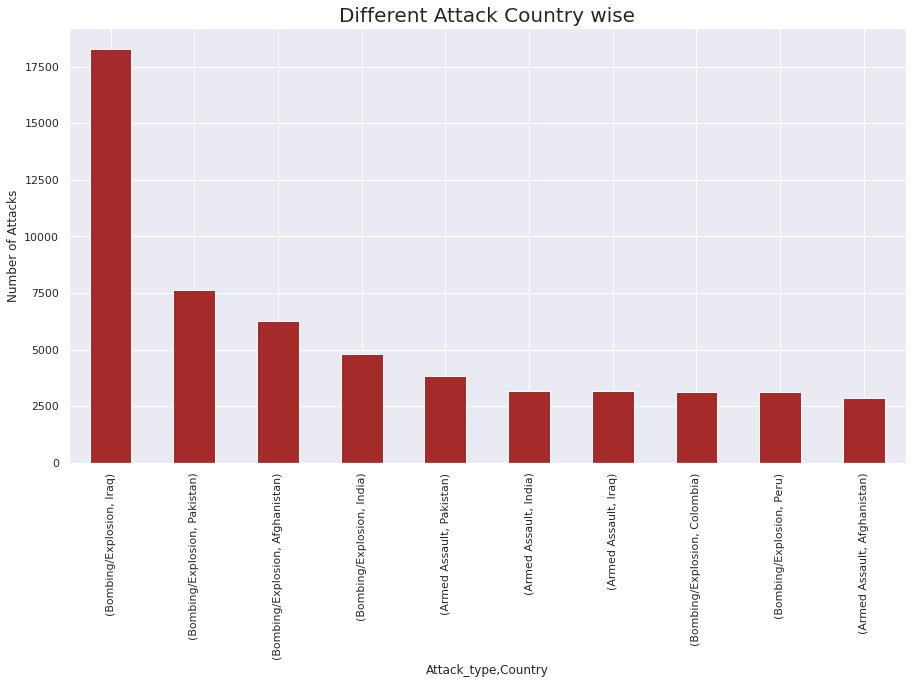

In [74]:
# plotting the graph to represent Number of attack types in each country.
AT_C.plot(kind='bar',figsize=(15,8),color='brown')
plt.title("Different Attack Country wise",fontsize='20')
plt.ylabel("Number of Attacks")
plt.show()


In [75]:
# Displaying the Number of people Killed due to different attacks in each country.
AC_K=data[['Attack_type','Country','Killed']].groupby(['Attack_type','Country']).sum().sort_values(by='Killed',ascending=False).head(10)
AC_K

Killed
Attack_type       Country             
Bombing/Explosion Iraq         53578.0
                  Afghanistan  16770.0
Armed Assault     Nigeria      14087.0
                  Afghanistan  13367.0
Bombing/Explosion Pakistan     12302.0
Armed Assault     Nicaragua     9646.0
                  El Salvador   9585.0
                  India         9378.0
Bombing/Explosion Syria         9192.0
Armed Assault     Iraq          9175.0

In [76]:
# Displaying the Number of people Wounded due to different attacks in each country.
AC_W=data[['Attack_type','Country','Wounded']].groupby(['Attack_type','Country']).sum().sort_values(by='Wounded',ascending=False).head(10)
AC_W

Wounded
Attack_type       Country                
Bombing/Explosion Iraq           124817.0
                  Pakistan        33007.0
                  Afghanistan     26563.0
                  India           20847.0
Hijacking         United States   16512.0
Bombing/Explosion Syria           13293.0
                  Sri Lanka       12140.0
                  Lebanon          9460.0
                  Philippines      8602.0
Armed Assault     Afghanistan      8401.0

# **INFERENCE**
 ### Due to **Bombing/Explosion** : **Iraq** has maximum number of killed i.e **53578**.

###  Due to **Bombing/Explosion** : **Iraq** has maximum number of Wounded i.e **124817**.

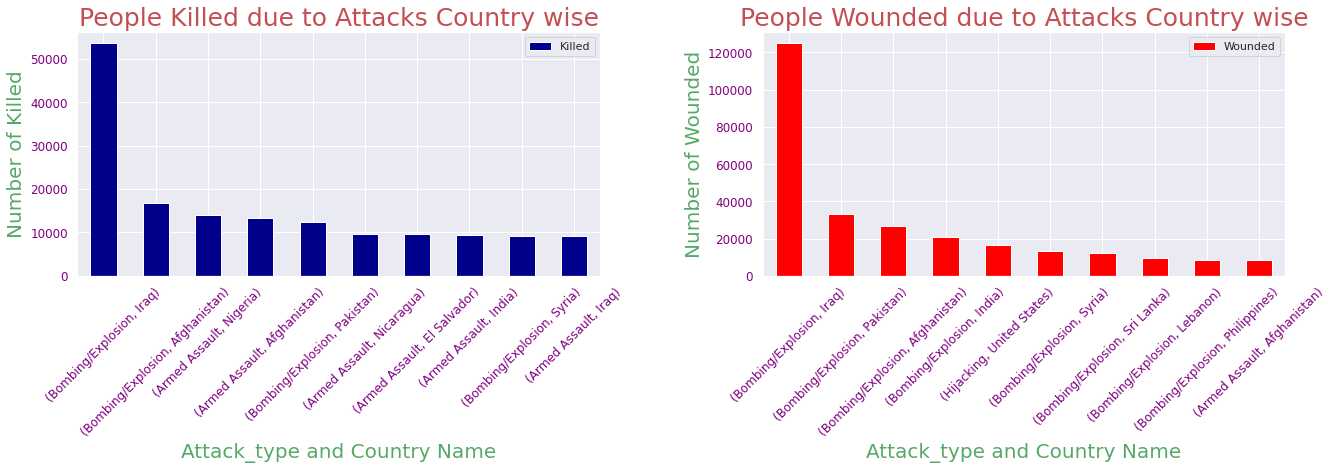

In [77]:
# Plotting a graph to represent Number of people Killed and Wounded due to different attack in each country. 
plt.figure(figsize=(20,8))

ax0=plt.subplot(1,2,1)
AC_K.plot(kind='bar',color="darkblue",ax=ax0)
plt.title("People Killed due to Attacks Country wise",fontsize=25,color='r')
plt.xlabel("Attack_type and Country Name",fontsize=20,color="g")
plt.xticks(rotation=45,fontsize=12,color='purple')
plt.ylabel("Number of Killed",fontsize=20,color="g")
plt.yticks(fontsize=12,color='purple')


ax1=plt.subplot(1,2,2)
AC_W.plot(kind='bar',color="red",ax=ax1)
plt.title("People Wounded due to Attacks Country wise",fontsize=25,color='r')
plt.xlabel("Attack_type and Country Name",fontsize=20,color="g")
plt.xticks(rotation=45,fontsize=12,color='purple')
plt.ylabel("Number of Wounded",fontsize=20,color="g")
plt.yticks(fontsize=12,color='purple')
plt.tight_layout(5)
plt.show()

#**The below map shows the parts of the countries that are attacked by the top 10 terrorist organisations**

In [78]:
import folium
from folium.plugins import MarkerCluster

In [79]:
terror_group = data.dropna(subset=['Latitude','Longitude'])

In [80]:
terror_group = terror_group.drop_duplicates(subset=['Country','Group_name'])

In [81]:
terrorist_groups = data.Group_name.value_counts()[1:10].index.tolist()

In [82]:
terror_group = terror_group.loc[terror_group.Group_name.isin(terrorist_groups)]

In [83]:
terror_group.Group_name.unique()

array(["New People's Army (NPA)", 'Irish Republican Army (IRA)',
       'Revolutionary Armed Forces of Colombia (FARC)',
       'Shining Path (SL)',
       'Farabundo Marti National Liberation Front (FMLN)', 'Taliban',
       'Al-Shabaab', 'Boko Haram',
       'Islamic State of Iraq and the Levant (ISIL)'], dtype=object)

In [84]:
m1 = folium.Map(location=[20, 0], tiles="Stamenterrain", zoom_start=2)
marker_cluster = MarkerCluster(
    name='clustered icons',overlay=True,control=False,icon_create_function=None)
for i in range(0,len(terror_group)):
    marker=folium.Marker([terror_group.iloc[i]['Latitude'],terror_group.iloc[i]['Longitude']]) 
    popup='Group:{}<br>Country:{}'.format(terror_group.iloc[i]['Group_name'],
                                          terror_group.iloc[i]['Country'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
marker_cluster.add_to(m1)
folium.TileLayer('openstreetmap').add_to(m1)
folium.LayerControl().add_to(m1)

In [85]:
m1

In [86]:
Total_kill=data.loc[:,'Killed'].sum()
print("Total Number of People killed due to Terrorist attack around the world :" ,int(Total_kill))

Total Number of People killed due to Terrorist attack around the world : 411868


In [87]:
Total_Wound=data.loc[:,'Wounded'].sum()
print("Total Number of People Wounded due to Terrorist attack around the world :" ,int(Total_Wound))

Total Number of People Wounded due to Terrorist attack around the world : 523869


In [88]:
Total_Casualty=data.loc[:,'Casualty'].sum()
print("Total Number of People Casualty due to Terrorist attack around the world :" ,int(Total_Casualty))

Total Number of People Casualty due to Terrorist attack around the world : 935737


## **SUMMARY**
###I worked on Global Terrorism Analysis project Indivisually.
###I took up this Project as it grabbed my interest i found it to be unique among all the projects.I first took my time to understand the dataset and then what is understood from the data was their were several attacks happend from 1970 to 2017 in different country  by many different Groups using many Weapons due to which many people got killed and Wounded. 
###I first started with Data cleaning were i removed all the unwanted Columns and Renamed all the useful columns for better understanding then i started to check which country was most affected in every year from 1970 to 2017 then i looked up for Top 10 most affected Countries and also how many people got Killed and Wounded in these Countries then i tried to go more in depth into dataset and started to Analyse the data  according to Attacks in different City,Region,Weapons used ,types of Attacks and different targets types.



# **Conslusion**

**1) Number of Attacks in particular Year:**
###(i) Attacks
    (a) Most number of attacks: 16903 in 2014
    (b) Least number of attacks: 471 in 1971
###(ii) Killed
    (a) Most number of people killed: 44490 in 2014
    (b) Least number of people killed: 173 in 1971
###(iii) Wounded
    (a) Most number of people wounded: 44043 in 2015
    (b) Least number of people wounded: 82 in 1971
###(iv) Casualties
    (a) Most number of casualties: 85618 in 2014
    (b) Least number of casualties: 255 in 1971

**2)Top 10 Countries wise Attacks**
###(i) Attacks
    (a) Most number of attacks: 24636 in "Iraq"
    (b) Least number of attacks: 4292 in "Turkey"
###(ii) Killed
    (a) Most number of people killed: 78589 in "Iraq"
    (b) Least number of people killed: 12053 in "El Salvador"
###(iii) Wounded
    (a) Most number of people wounded: 134690 in "Iraq"
    (b) Least number of people wounded: 10328 in "Colombia"

**3)Top 10 Terrorist groups with highest terror attacks:**
###(i) Attacks
    (a) Most number of attacks : 7478 by "Taliban"
    (b) Least number of attacks : 2418 by "Boko Haram"
###(ii) Killed
    (a) Most number of people killed : 38923 by "Islamic State of Iraq and the Levant (ISIL)"
    (b) Least number of people killed : 5661 by "Revolutionary Armed Forces of Colombia (FARC)"
###(iii) Wounded
    (a) Most number of people wounded : 30672 by "Islamic State of Iraq and the Levant (ISIL)"
    (b) Least number of people wounded : 4908 by "Kurdistan Workers' Party (PKK)"

**4)Types of Attacks in terror attacks:**
###(i) Attacks
    (a) Most number of attacks : 88255 by "Bombing/Explosion"
    (b) Least number of attacks : 659 by "Hijacking"
###(ii) Killed
    (a) Most number of people killed : 160297 by "Armed Assault"
    (b) Least number of people killed : 880 by "Unarmed Assault"
###(iii) Wounded
    (a) Most number of people wounded : 372686 by "Bombing/Explosion"
    (b) Least number of people wounded : 3765 by "Facility/Infrastructure Attack"



**5)Region wise Attacks :**
###(i) Attacks
    (a) Most number of attacks: 50474 in "Middle East & North Africa"
    (b) Least number of attacks: 282 in "Australasia & Oceania"
###(ii) Killed
    (a) Most number of people killed: 137642 in "Middle East & North Africa"
    (b) Least number of people killed: 150 in "Australasia & Oceania"
###(iii) Wounded
    (a) Most number of people wounded: 214308 in "Middle East & North Africa"
    (b) Least number of people wounded: 260 in "Australasia & Oceania"
###(iv) Casualties
    (a) Most number of casualties: 351950 in "Middle East & North Africa"
    (b) Least number of casualties: 410 in Australasia & Oceania

**6)City wise Attacks [Top 10] :**
###(i) Attacks
    (a) Most number of attacks: 7589 in "Baghdad"
    (b) Least number of attacks: 1019 in "Athens"
###(ii) Killed
    (a) Most number of people killed: 21151 in "Baghdad"
    (b) Least number of people killed: 2125 in "Aleppo"
###(iii) Wounded
    (a) Most number of people wounded: 56725 in "Baghdad"
    (b) Least number of people wounded: 4955 in "Mogadishu"
###(iv) Casualties
    (a) Most number of casualties: 77876 in "Baghdad"
    (b) Least number of casualties: 5748 in "Aleppo"


**7)Attack Type wise Attacks:**
##(i) Attacks
    (a) Most number of attacks : 88255 by "Bombing/Explosion"
    (b) Least number of attacks : 659 by "Hijacking"
##(ii) Killed
    (a) Most number of people killed : 160297 by "Armed Assault"
    (b) Least number of people killed : 880 by "Unarmed Assault"
##(iii) Wounded
    (a) Most number of people wounded : 372686 by "Bombing/Explosion"
    (b) Least number of people wounded : 3765 by "Facility/Infrastructure Attack"
##(iv) Casualties
    (a) Most number of casualties : 530007 by "Bombing/Explosion"
    (b) Least number of casualties : 7407 by "Facility/Infrastructure Attack"


**8)Attack_type and Country wise Attacks :**
###(i) Due to Bombing/Explosion : Iraq has maximum number of Attacks i.e 18286.
###(ii)Due to Bombing/Explosion : Iraq has maximum number of killed i.e 53578.
###(iii)Due to Bombing/Explosion : Iraq has maximum number of Wounded i.e 124817.

**Terrorist Attacks from 1970 to 2017 :**
###(i) Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 411868
###(ii) Total number of people Wounded due to Terrorist Attacks from 1970 to 2017 across the world : 523869
###(iii) Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world : 935737